In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Read cleaned dataset into notebook
data= pd.read_csv('../data/cleaned_data.csv')

In [3]:
data

,distance,consumption,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [4]:
#Define a function to return two dataframes with numerical and categorical separated
def df_split(df):
    numericals = df.select_dtypes(np.number)
    categoricals = df.select_dtypes('object')
    return numericals, categoricals

In [5]:
numericals, categoricals = df_split(data)

In [6]:
numericals

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


In [7]:
categoricals

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


In [8]:
#Get correlation matrix for the numerical variables. 
numerical_corr = numericals.corr()
numerical_corr 

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun
distance,1.000000,-0.128967,0.562299,0.074734,0.088175,-0.025738,-0.019791,0.081120
consumption,-0.128967,1.000000,-0.227866,-0.161470,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059139,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.074734,-0.161470,0.059139,1.000000,0.359649,0.296719,-0.037204,0.242237
temp_outside,0.088175,-0.320811,0.015411,0.359649,1.000000,0.167562,-0.186315,0.346903
ac,-0.025738,0.096591,-0.035408,0.296719,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.037204,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.242237,0.346903,0.088598,-0.112650,1.000000


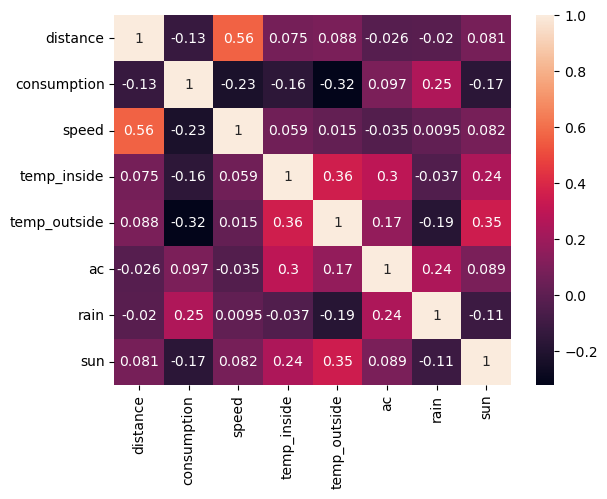

In [9]:
sns.heatmap(numerical_corr, annot=True)
plt.show()

Speed and distance have the strongest correlation of 0.56 followed by temp_outside and temp_inside which is expected 

In [10]:
def numerical_split(df, c=10):
    continuous = []
    discrete = []
    for col in df:
        if len(df[col].value_counts())> c:#continuous dataframe with those columns
            continuous.append(df[col])
        else: #discrete dataframe with remaining columns
            discrete.append(df[col])
    continuous_df = pd.DataFrame(continuous).T #needs to be transposed
    discrete_df = pd.DataFrame(discrete).T
    return continuous_df, discrete_df  

In [11]:
continuous_df, discrete_df = numerical_split(numericals)

In [12]:
continuous_df.head()

,distance,consumption,speed,temp_inside,temp_outside
0,28.0,5.0,26.0,21.5,12.0
1,12.0,4.2,30.0,21.5,13.0
2,11.2,5.5,38.0,21.5,15.0
3,12.9,3.9,36.0,21.5,14.0
4,18.5,4.5,46.0,21.5,15.0


In [13]:
discrete_df.head()

,ac,rain,sun
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [14]:
# Function to create histogram for continuous data
def plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for col in df:
        sns.histplot(df[col])
        plt.show()

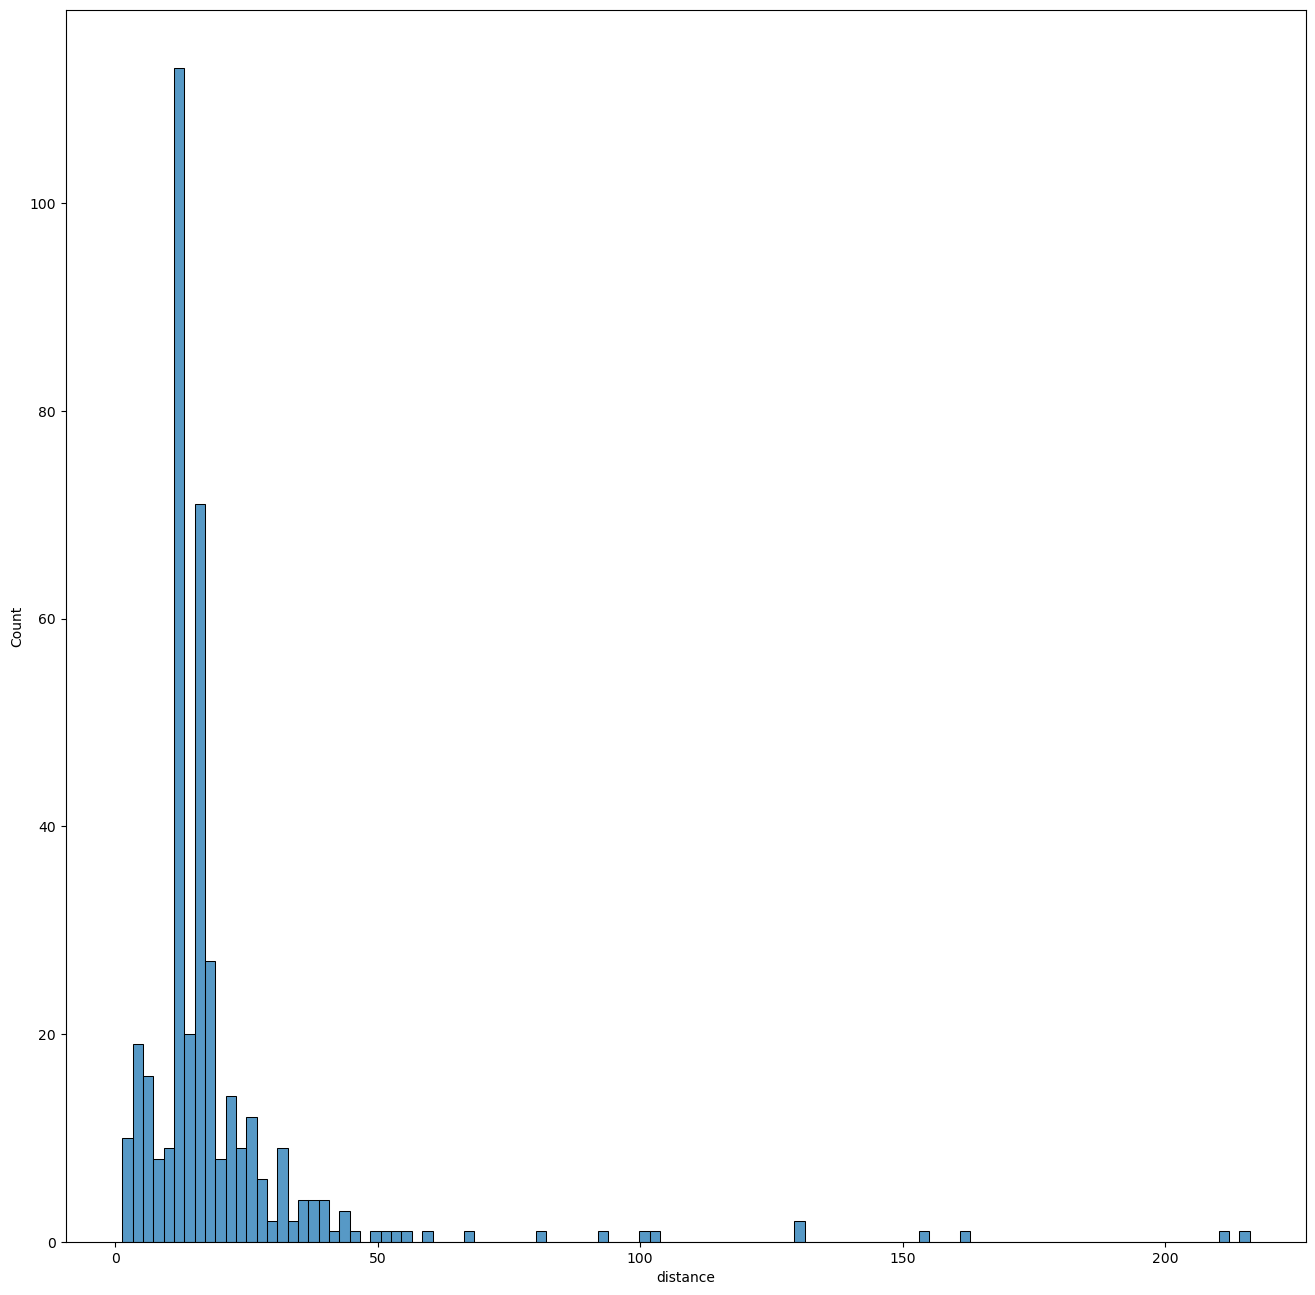

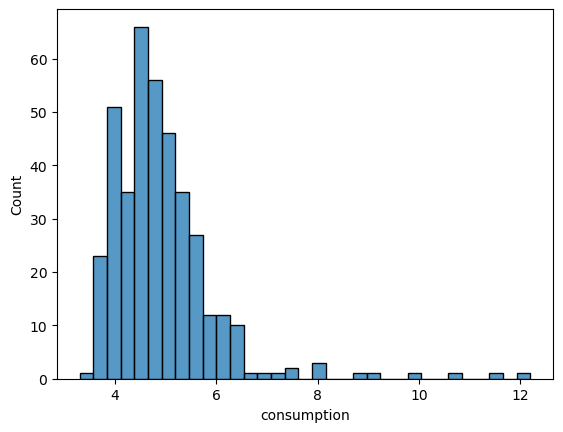

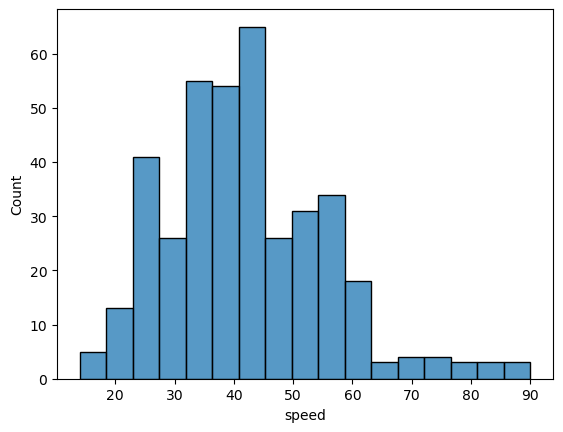

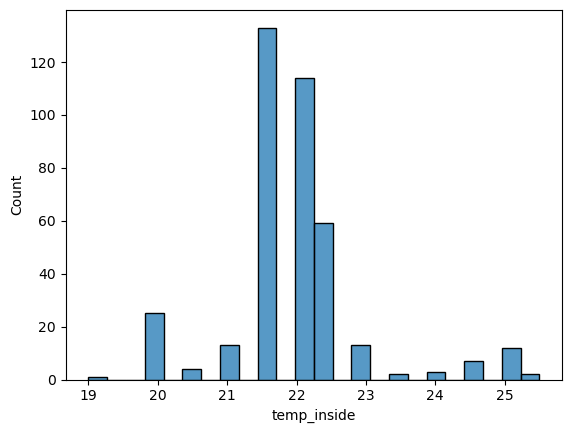

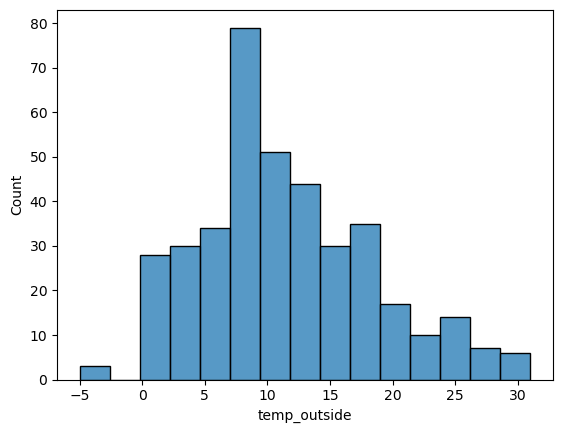

In [15]:
plots(continuous_df)

According to previous plots there are some skewed distribtions and also they will need to be put in the same scale when creating any models. 


In [16]:
# Look for outliers in the continous variables

In [17]:
def box_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for col in df:
        sns.boxplot(data= df, x=df[col])
        plt.show()

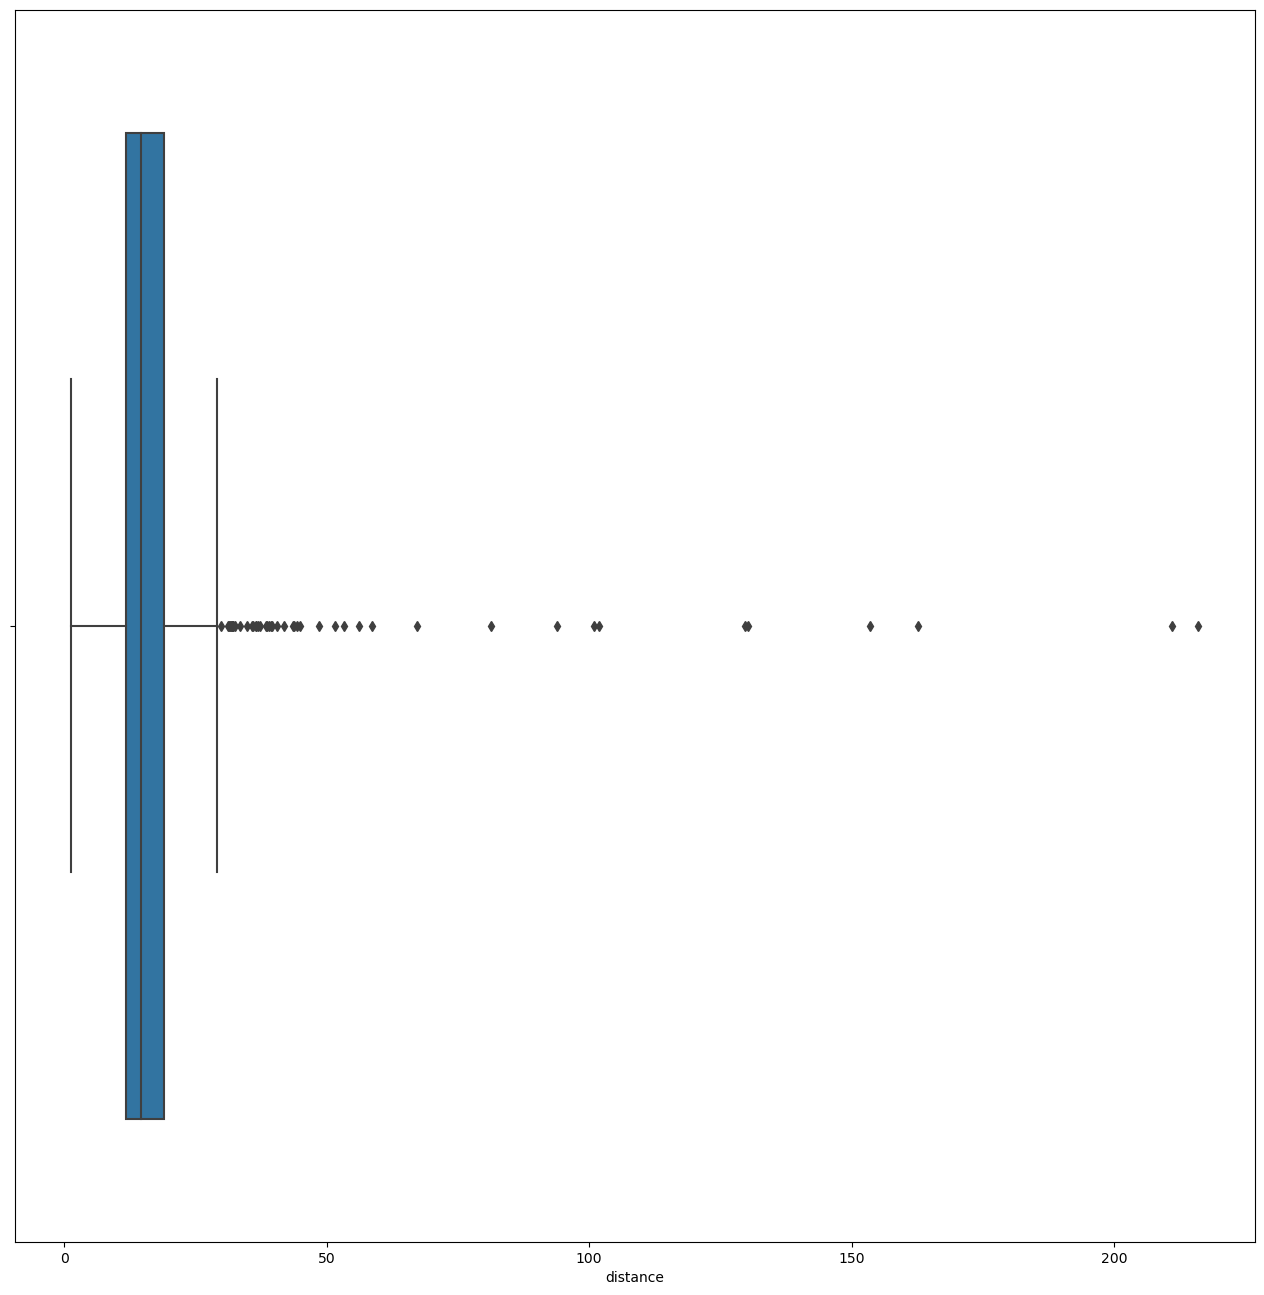

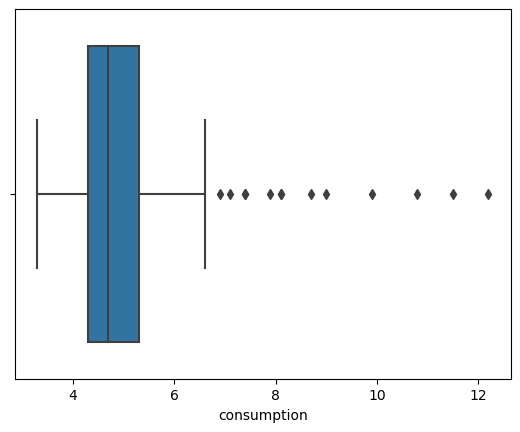

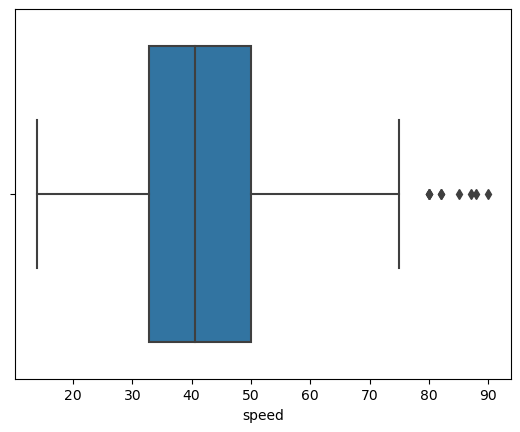

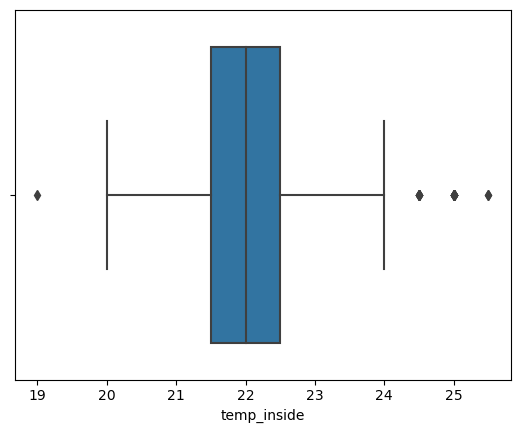

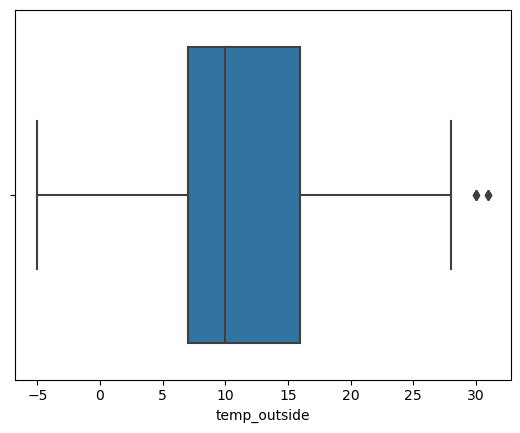

In [18]:
box_plots(continuous_df)

In [19]:
#Create barplots for the discrete data
def discrete_plots(df):
    fig, ax = plt.subplots(figsize=(16,16))
    for i in df.columns:
        d = pd.DataFrame(df[i].value_counts()).reset_index()
        sns.barplot(data= df, x=d.iloc[:,0], y=d.iloc[:,1], ci=None)
        plt.tight_layout()
        plt.show()

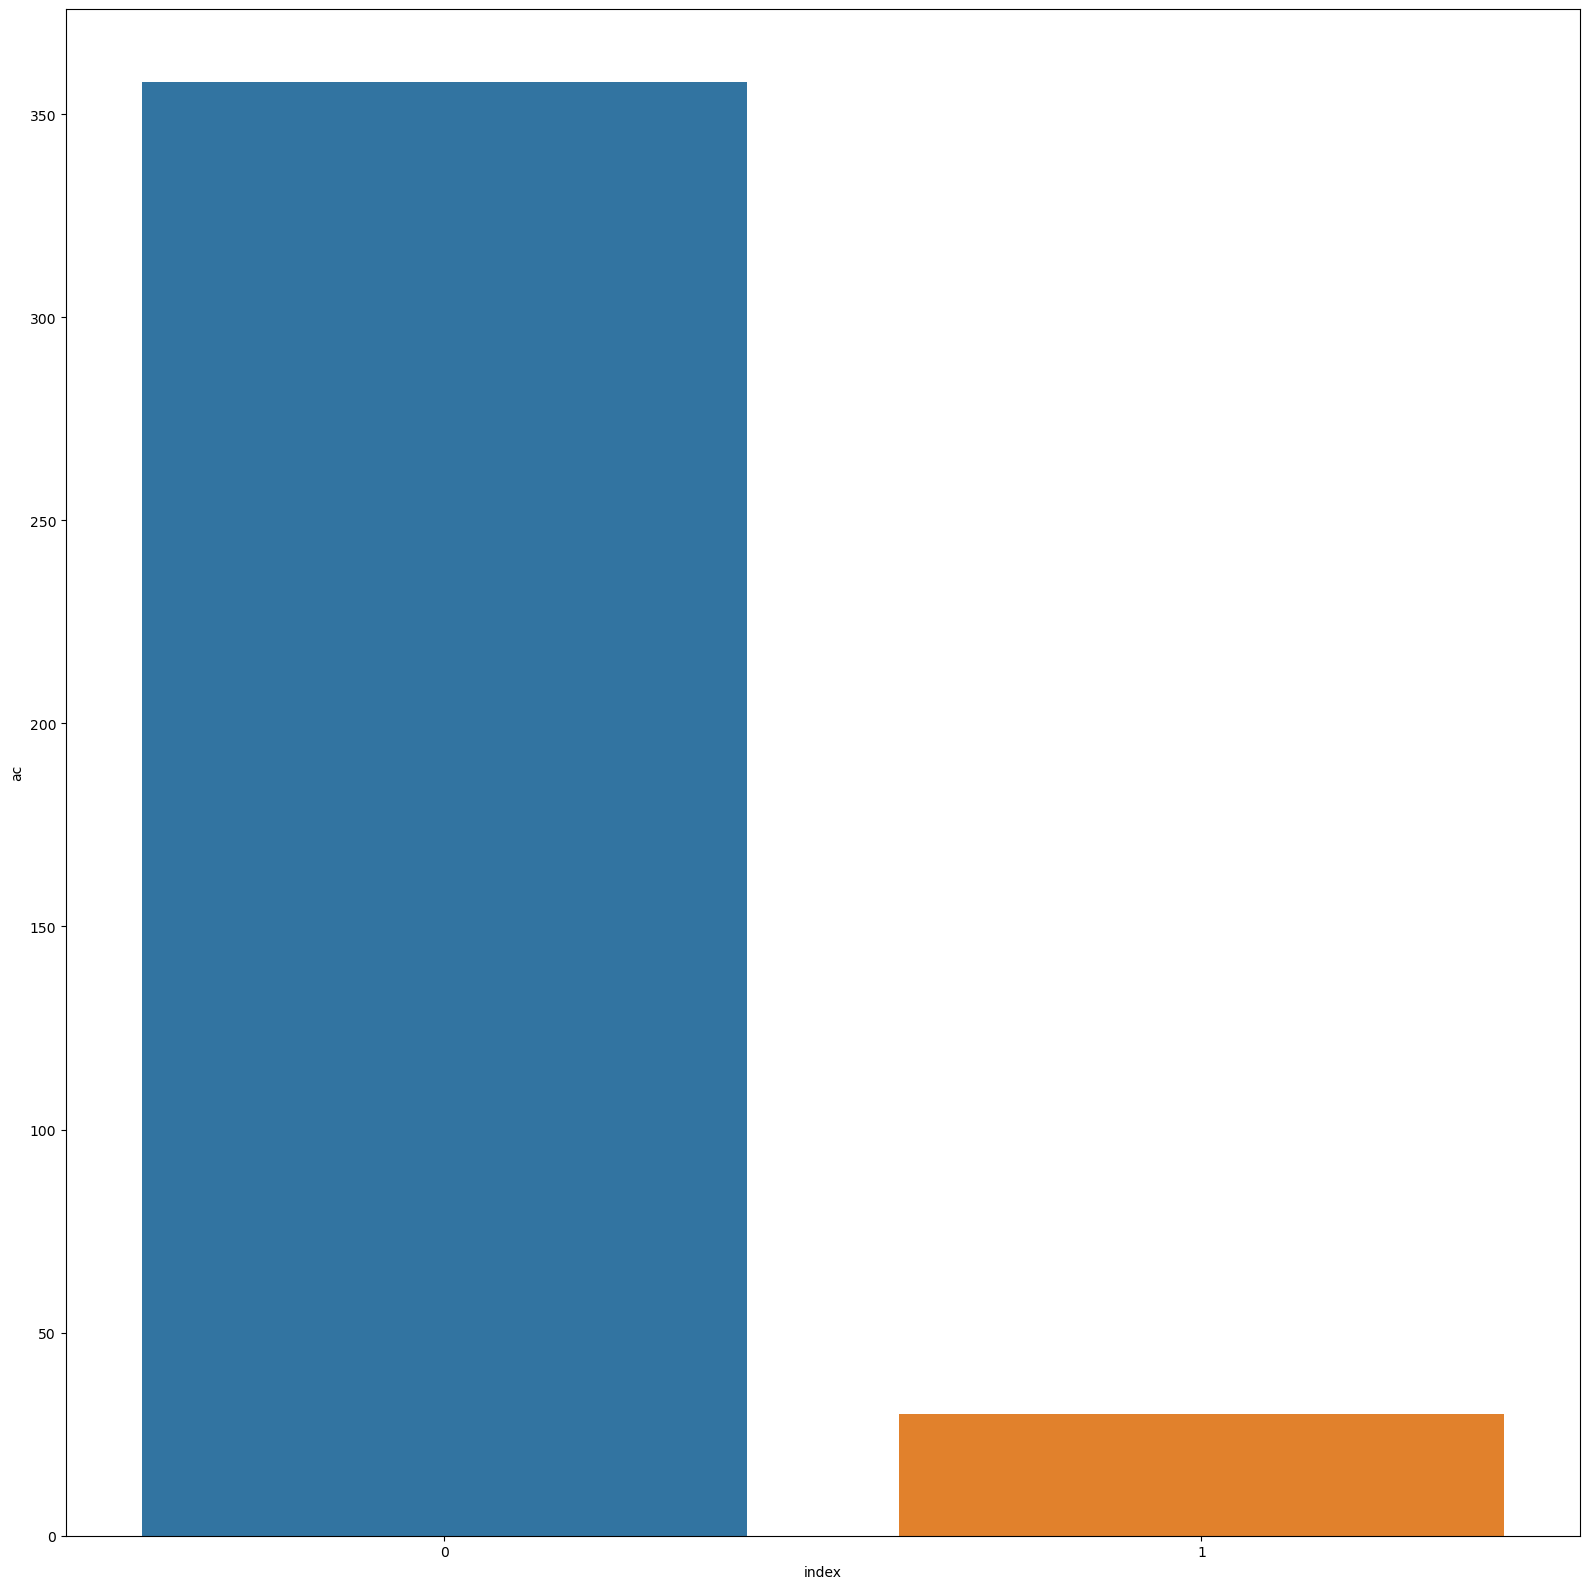

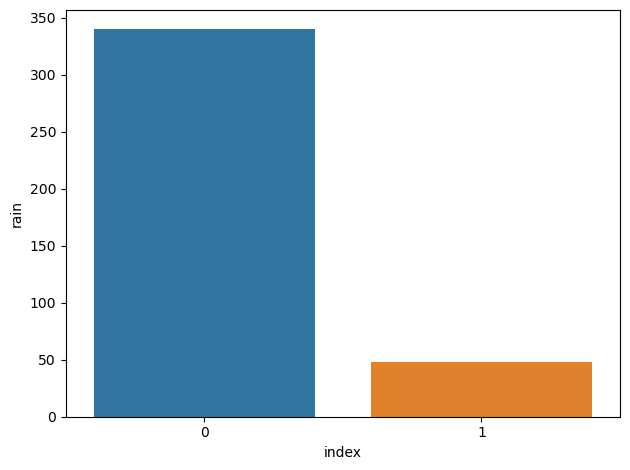

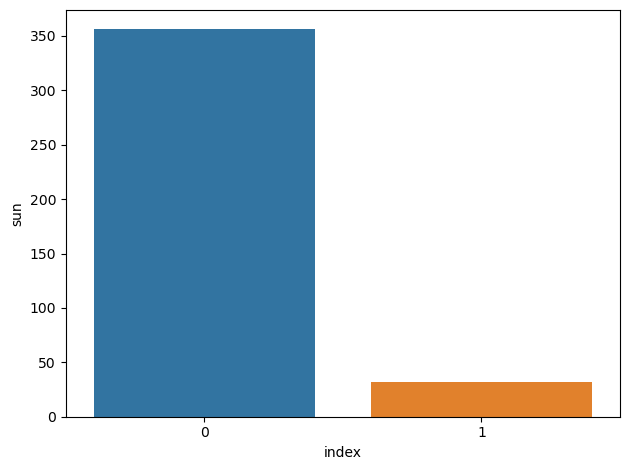

In [20]:
discrete_plots(discrete_df)

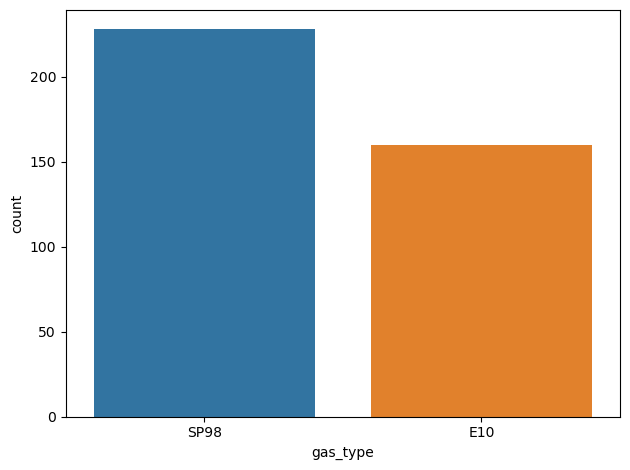

In [21]:
# Look at categorical data
sns.countplot(data=categoricals, x=data['gas_type'], order = data['gas_type'].value_counts().index)
plt.tight_layout()
plt.show() 

Compare consumption of both fuel types on temperature, speed, distance, ac and weather.

<AxesSubplot:xlabel='speed', ylabel='consumption'>

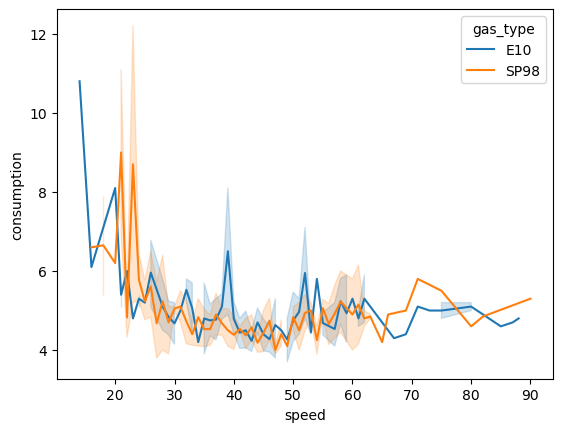

In [22]:
sns.lineplot(x=data['speed'],y=data['consumption'],hue=data['gas_type'])

<AxesSubplot:xlabel='distance', ylabel='consumption'>

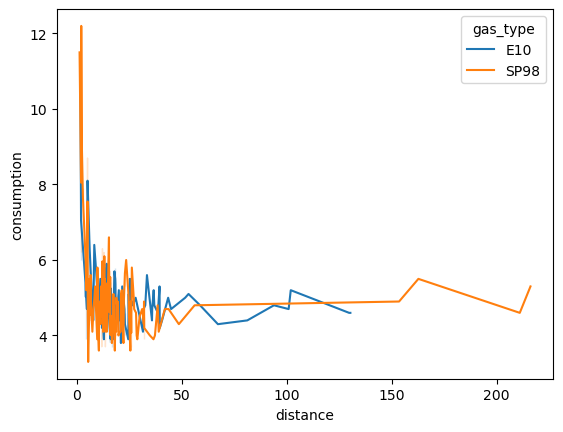

In [23]:
sns.lineplot(x=data['distance'],y=data['consumption'],hue=data['gas_type'])

<AxesSubplot:xlabel='temp_outside', ylabel='consumption'>

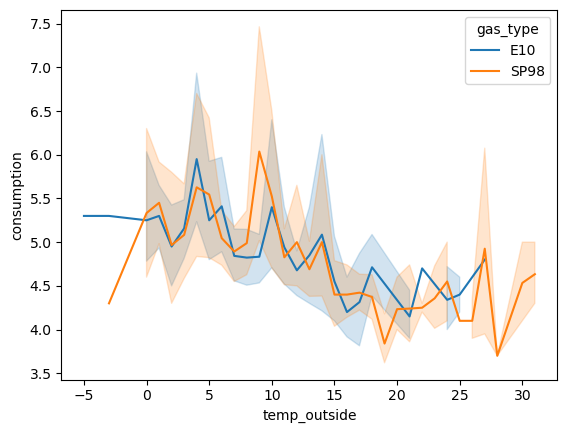

In [24]:
sns.lineplot(x=data['temp_outside'],y=data['consumption'],hue=data['gas_type'])

<AxesSubplot:xlabel='rain', ylabel='consumption'>

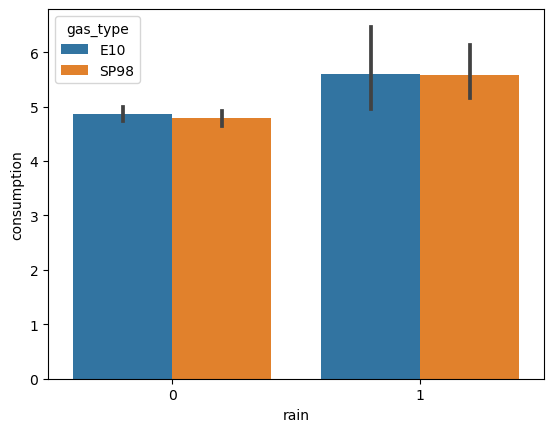

In [25]:
sns.barplot(x=data['rain'],y=data['consumption'],hue=data['gas_type'])

<AxesSubplot:xlabel='sun', ylabel='consumption'>

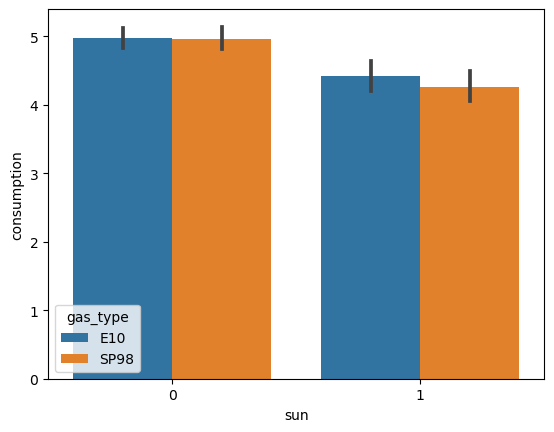

In [26]:
sns.barplot(x=data['sun'],y=data['consumption'],hue=data['gas_type'])

<AxesSubplot:xlabel='ac', ylabel='consumption'>

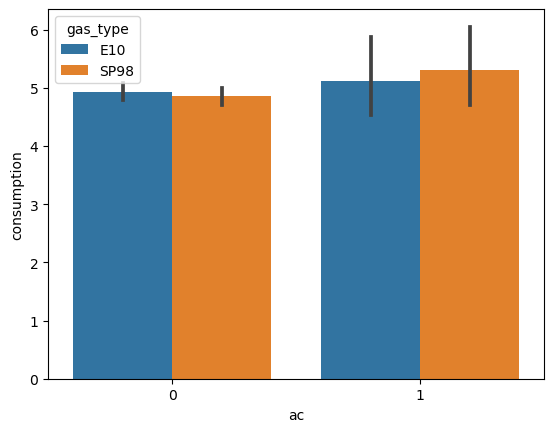

In [27]:
sns.barplot(x=data['ac'],y=data['consumption'],hue=data['gas_type'])

Conclusions:

* Speed has similar effects on both gas types where at lower speeds consumption is less efficient than at higher speeds.
* Distance has similar effects on both gas types where at lower distances consumption is less efficient than at higher distances.
* When temperature outside is hotter, consumption across both gas types is lower. 
* When it is raining, consumption for both gas types is higher.
* When it is sunny, consumption for both gas types is lower.
* When the AC is on, consumption for both gas types is higher.


In [28]:
# Encode the gas type to carry out hypothesis testing and model prediction.
data['gas_type'] = [0 if x=='SP98' else 1 for x in data['gas_type']]


In [29]:
# Hypothesis test to see if the consumption between the two gas types is the same or not.
stats.ttest_ind(data[data['gas_type']==1]['consumption'], data[data['gas_type']==0]['consumption'])

Ttest_indResult(statistic=0.3011626300254617, pvalue=0.7634526478628367)

With a signifance level at 0.05 we can accept the null hypothesis that the two fuels are not statistically significant as p-value is greater than 0.05.

## Predicting fuel consumption

In [30]:
data.describe()

,distance,consumption,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.412371,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.492897,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# As we saw earlier there were some outliers which we can remove
def remove_outliers(df):
    df2=df.copy()
    thr = 3
    col=list(df2.columns)
    for col in df2[col]:
        df2 = df2[(np.abs(df2[col]-df2[col].mean()) <= (thr*df2[col].std()))]
    return df2

In [32]:
continuous_cleaned_df = remove_outliers(continuous_df)
continuous_cleaned_df

,distance,consumption,speed,temp_inside,temp_outside
0,28.0,5.0,26.0,21.5,12.0
1,12.0,4.2,30.0,21.5,13.0
2,11.2,5.5,38.0,21.5,15.0
3,12.9,3.9,36.0,21.5,14.0
4,18.5,4.5,46.0,21.5,15.0
...,...,...,...,...,...
379,16.7,3.8,44.0,24.5,23.0
380,8.3,5.0,52.0,24.5,27.0
381,5.5,3.7,33.0,24.5,28.0
382,13.6,3.7,33.0,24.5,28.0


In [33]:
data2 = pd.concat([continuous_cleaned_df, discrete_df, data['gas_type']],axis=1).dropna().reset_index(drop=True)
data2

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,28.0,5.0,26.0,21.5,12.0,0,0,0,1
1,12.0,4.2,30.0,21.5,13.0,0,0,0,1
2,11.2,5.5,38.0,21.5,15.0,0,0,0,1
3,12.9,3.9,36.0,21.5,14.0,0,0,0,1
4,18.5,4.5,46.0,21.5,15.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
349,16.7,3.8,44.0,24.5,23.0,0,0,1,0
350,8.3,5.0,52.0,24.5,27.0,0,0,0,0
351,5.5,3.7,33.0,24.5,28.0,0,0,1,0
352,13.6,3.7,33.0,24.5,28.0,0,0,1,0


In [34]:
data2.describe()

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,16.758475,4.817514,41.067797,21.803672,10.920904,0.053672,0.121469,0.076271,0.415254
std,9.821743,0.744101,11.676030,0.786042,6.577450,0.225689,0.327134,0.265807,0.493463
min,2.000000,3.300000,16.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,33.000000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.200000,4.700000,40.000000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,18.475000,5.200000,49.750000,22.000000,15.000000,0.000000,0.000000,0.000000,1.000000
max,81.200000,7.900000,75.000000,24.500000,30.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Define X and y
X = data2.drop(['consumption'], axis =1)
y = data2['consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [36]:
# Scale using min/max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Scale train set
X_train_scaled_np = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, index=X_train.index)
X_train_scaled_df.columns = X_train.columns
# Scale test set
X_test_scaled_np = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, index=X_test.index)
X_test_scaled_df.columns = X_test.columns

In [37]:
X_train_scaled_df.describe()

,distance,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.184497,0.418788,0.403059,0.446964,0.048583,0.125506,0.080972,0.417004
std,0.119078,0.189697,0.178619,0.192739,0.215431,0.331965,0.273345,0.494065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.123737,0.288136,0.333333,0.314286,0.000000,0.000000,0.000000,0.000000
50%,0.152778,0.406780,0.444444,0.428571,0.000000,0.000000,0.000000,0.000000
75%,0.212753,0.550847,0.444444,0.571429,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Train a simple linear regression model and get the predictions
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train_scaled_df, y_train)

y_pred_train = lm.predict(X_train_scaled_df)
y_pred_test = lm.predict(X_test_scaled_df)

In [39]:
#Create a function that given a model prediction and real values returns a dataframe. 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

def errors(y_pred, y):
    error_df = pd.DataFrame(columns = ['value'], index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    mae = mean_absolute_error(y_pred, y).round(3)
    mse = mean_squared_error(y_pred, y) .round(3)
    rmse = round(sqrt(mean_squared_error(y_pred, y)),3)
    mape = mean_absolute_percentage_error(y_pred,y).round(3)
    r2 = r2_score(y_pred, y).round(3)
    
    values=[mae,mse,rmse,mape,r2]
    error_df['value']=values
    
    return error_df


In [40]:
# Evaluate the model predictions using the previous function on the train and test sets
errors(y_pred_train, y_train)

,value
MAE,0.469
MSE,0.335
RMSE,0.579
MAPE,0.097
R2,-1.073


## Compare between fuel types

## E10

In [41]:
e10 = data2[data2['gas_type']==1].reset_index(drop=True)
e10

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,28.0,5.0,26.0,21.5,12.0,0,0,0,1
1,12.0,4.2,30.0,21.5,13.0,0,0,0,1
2,11.2,5.5,38.0,21.5,15.0,0,0,0,1
3,12.9,3.9,36.0,21.5,14.0,0,0,0,1
4,18.5,4.5,46.0,21.5,15.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
142,16.0,3.8,42.0,22.0,17.0,0,0,0,1
143,16.0,4.0,42.0,22.0,15.0,0,0,0,1
144,15.4,4.8,40.0,22.0,18.0,0,0,0,1
145,17.2,3.9,35.0,22.0,16.0,0,0,0,1


In [42]:
# Define X and y
X = e10.drop(['consumption','gas_type'], axis =1)
y = e10['consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [43]:
# Scale using min/max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Scale train set
X_train_scaled_np = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, index=X_train.index)
X_train_scaled_df.columns = X_train.columns
# Scale test set
X_test_scaled_np = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, index=X_test.index)
X_test_scaled_df.columns = X_test.columns

In [44]:
X_train_scaled_df.describe()

,distance,speed,temp_inside,temp_outside,ac,rain,sun
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.191969,0.425490,0.565359,0.497386,0.039216,0.098039,0.098039
std,0.131906,0.218368,0.288348,0.201681,0.195066,0.298836,0.298836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130051,0.285000,0.333333,0.375000,0.000000,0.000000,0.000000
50%,0.169192,0.420000,0.333333,0.466667,0.000000,0.000000,0.000000
75%,0.208018,0.580000,0.666667,0.633333,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#Train a simple linear regression model and get the predictions
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train_scaled_df, y_train)

y_pred_train = lm.predict(X_train_scaled_df)
y_pred_test = lm.predict(X_test_scaled_df)

In [46]:
# Evaluate the model predictions using the previous function on the train and test sets
errors(y_pred_train, y_train)

,value
MAE,0.512
MSE,0.414
RMSE,0.644
MAPE,0.105
R2,-1.391


In [47]:
# Extract the coefficients and store them in a data frame
column_names = ['Intercept']+list(X.columns)
coefficients_df_e10 = pd.DataFrame({'Variable': column_names, 'Coefficient': np.append(lm.intercept_, lm.coef_)})

# Print the data frame
print(coefficients_df_e10)

       Variable  Coefficient
0     Intercept     5.868695
1      distance    -1.230162
2         speed    -0.067488
3   temp_inside     0.211287
4  temp_outside    -1.710713
5            ac    -0.142133
6          rain     0.267548
7           sun    -0.379134


## SP98

In [48]:
sp98 = data2[data2['gas_type']==0].reset_index(drop=True)
sp98

,distance,consumption,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,5.4,3.3,32.0,21.5,7.0,0,0,0,0
1,14.2,5.1,32.0,21.5,7.0,0,0,0,0
2,16.0,4.9,25.0,21.5,8.0,0,0,0,0
3,11.8,4.9,25.0,21.5,11.0,0,0,0,0
4,27.3,4.7,36.0,21.5,10.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
202,16.7,3.8,44.0,24.5,23.0,0,0,1,0
203,8.3,5.0,52.0,24.5,27.0,0,0,0,0
204,5.5,3.7,33.0,24.5,28.0,0,0,1,0
205,13.6,3.7,33.0,24.5,28.0,0,0,1,0


In [49]:
# Define X and y
X = sp98.drop(['consumption','gas_type'], axis =1)
y = sp98['consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [50]:
# Scale using min/max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Scale train set
X_train_scaled_np = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, index=X_train.index)
X_train_scaled_df.columns = X_train.columns
# Scale test set
X_test_scaled_np = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, index=X_test.index)
X_test_scaled_df.columns = X_test.columns

In [51]:
X_train_scaled_df.describe()

,distance,speed,temp_inside,temp_outside,ac,rain,sun
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.293067,0.447982,0.508838,0.445497,0.083333,0.138889,0.069444
std,0.176362,0.212165,0.177090,0.207549,0.277350,0.347038,0.255096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210300,0.301887,0.454545,0.303030,0.000000,0.000000,0.000000
50%,0.243562,0.433962,0.545455,0.424242,0.000000,0.000000,0.000000
75%,0.328863,0.566038,0.545455,0.575758,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#Train a simple linear regression model and get the predictions
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train_scaled_df, y_train)

y_pred_train = lm.predict(X_train_scaled_df)
y_pred_test = lm.predict(X_test_scaled_df)

In [53]:
# Evaluate the model predictions using the previous function on the train and test sets
errors(y_pred_train, y_train)

,value
MAE,0.502
MSE,0.398
RMSE,0.631
MAPE,0.104
R2,-1.733


In [54]:
# Extract the coefficients and store them in a data frame
column_names = ['Intercept']+list(X.columns)
coefficients_df_sp98 = pd.DataFrame({'Variable': column_names, 'Coefficient': np.append(lm.intercept_, lm.coef_)})

# Print the data frame
print(coefficients_df_sp98)
print(coefficients_df_e10)

       Variable  Coefficient
0     Intercept     5.715205
1      distance    -1.138333
2         speed    -0.228997
3   temp_inside    -0.438142
4  temp_outside    -0.794609
5            ac     0.437805
6          rain     0.244558
7           sun    -0.104308
       Variable  Coefficient
0     Intercept     5.868695
1      distance    -1.230162
2         speed    -0.067488
3   temp_inside     0.211287
4  temp_outside    -1.710713
5            ac    -0.142133
6          rain     0.267548
7           sun    -0.379134


### Conclusions
* The variance of consumption is higher in E10 compared to SP98
* Consumption using E10 is higher than SP98
* Different weather conditions (rain, sun and temperature outside) affect both fuels in a similar way 
* However when AC is on using E10 fuel consumption decreases, on the other hand when AC is on using SP98 conumsption increases. In line with this we can see when temperature inside is lower and using E10, consumption decreases (it could be assumed AC is not on).  However when temperature inside is lower using SP98 consumption is lower (it could be assumed AC is not on).
* As the null hypothesis confirmed the difference between the two fuels is insignificant it would be good to obtain extra data
